In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4145960.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 135112.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1406366.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3174030.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images)) # ToTensor()에 의해서 0~1 사이값이 됨 (나중에 decoder에서 최종적으로 다시 이 범위 값으로 변형해야 함)

tensor(0.) tensor(1.)


In [5]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128), # N, 768 -> N, 128 (N : batch size)
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3) # N, 3
      )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12), # N, 3
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid() # N, 784의 형태로, 최초 encoder 들어가기 전과 같은 0~1의 값으로
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [6]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [7]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    # print(img.shape) : torch.Size([64, 784])
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0483
Epoch:2, Loss:0.0418
Epoch:3, Loss:0.0419
Epoch:4, Loss:0.0432
Epoch:5, Loss:0.0371
Epoch:6, Loss:0.0346
Epoch:7, Loss:0.0379
Epoch:8, Loss:0.0323
Epoch:9, Loss:0.0364
Epoch:10, Loss:0.0400


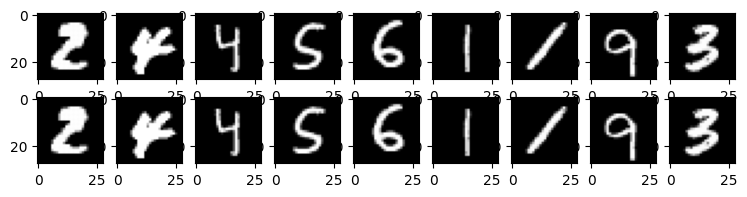

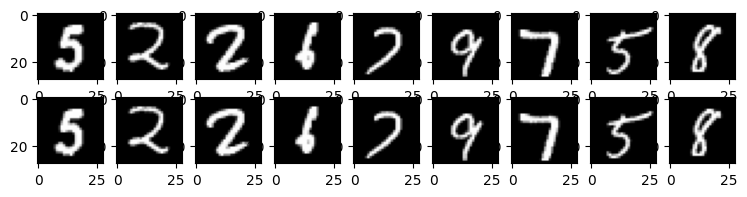

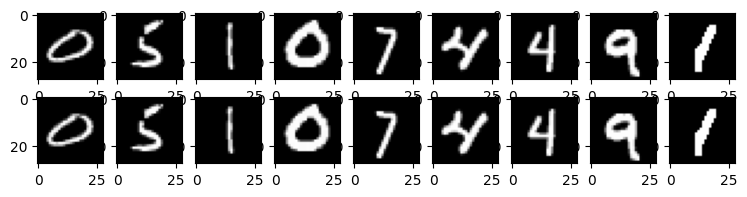

In [8]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy() #torch tensor이므로 detach 후 numpy로 변환
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1) # row_length+i
    item = item.reshape(-1, 28, 28)
    # print(item.shape) # item: 1, 28, 28
    plt.imshow(item[0])

  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1) # row_length+i+1
    item = item.reshape(-1, 28, 28)
    # print(item.shape) # item: 1, 28, 28
    plt.imshow(item[0])
